# Signal Processing in Biomedical - Midterm Project


# Brief Intoduction on ECG and ECG Signal

Electrography(ECG) is a diagnostic method that allows sensing and record the electrical activity of heart. The measurement of electrical activity is used as a standard twelve point system [1]. An electrocardiogram (ECG) signal is the expression of the myocardium electrical activity on the body surface, which appears as a nearly periodic signal. It is well known that ECG contains much information about heart disease. Traditionally, the ECG cycle is labeled using the letters P, Q, R, S, and T for the individual peaks of the whole cycle's waveform. It is pointed out that the R peak is always positive. The diagnosis is performed based on features extracted from the timing and morphology of these fiducial points. Therefore, the ECG detection is very important for the doctors to make a correct clinical diagnosis.

According to the medical definition, the most important information about ECG signal is almost concentrated on the P wave, QRS complex and T wave. These data include the positions and/or magnitudes of PR interval, QRS interval, QT interval, ST interval, PR segment, and ST segment. In fact, QRS detection is very difficult because of some problems, such as a noisy ECG signal, power-line interference, and T wave amplitude similar to QRS complex. To get the correct information, the above problems must be overcome[2][3].

In [102]:
%matplotlib inline

import scipy as Sci
import scipy.linalg
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt

ECG = open('aami3a.dat','rb')
ECG_Signal = np.fromfile(ECG,count=-1,dtype=np.uint16)
print('\n The length of the file is: ' + str(len(ECG_Signal)) )



 The length of the file is: 43081


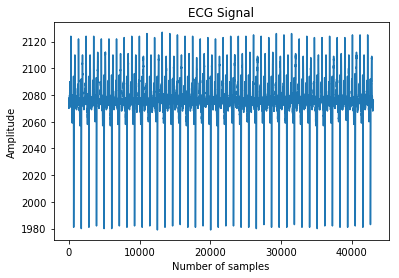

In [103]:
plt.plot(ECG_Signal[:43081])
plt.title('ECG Signal')
plt.xlabel('Number of samples')
plt.ylabel('Amplitude')
plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))
ECG.close() 

The average rate of a person is 60-100 bpm.

If we take for instance 80 bpm then,

80/60 = 1.3333 (beats per second)

Now, since we want 5 beats in the signal

Therefore, 1.3333*5=6.6667

Thus, number of samples= 6.6667/(1.3333*10e-3)

                       = 5000.150 which is approximately = 5000
                     


Here, if we consider cardiac cycle exactly = 60 bpm

Then, for 5 carddiac cycles it will take 5 seconds (+ time for signal acquiring and reverse recovery)
Cosidering that to be 2 seconds, then

Total time for 5 cardiac cycles = 7 seconds

Therefore, number of samples = 7/(1.3333*10e-3)

                             = 5250.131 which is approximately = 5250


 The number of samples for 5 beats in signal: 5250

 Peak is 2124


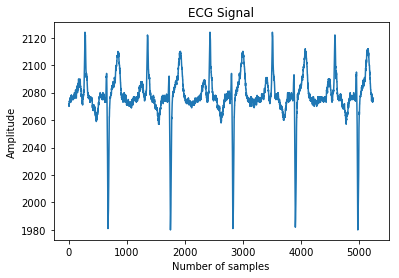

In [104]:
x=np.arange(0,5250/75e1,1/75e1)  
print('\n The number of samples for 5 beats in signal: ' + str(len(x)) )
plt.plot(ECG_Signal[:5250])
plt.title('ECG Signal')
plt.xlabel('Number of samples')
plt.ylabel('Amplitude')
plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))
ECG.close() 
y=np.max(ECG_Signal[:750])
print '\n Peak is ' +str (y)

In [105]:
x=np.arange(21541)
T=0
for index in x:
    if ECG_Signal[index]>=2124:
        T=T+1
print 'Heart beats per minute is ' +str(T*2)        
        

Heart beats per minute is 44


If we consider the entire signal for 1 complete minute, it has 43081 samples

Thus, by considering 30 seconds, the number of samples will be 21541. 

Thus giving the cardiac cycles as 44 bpm.

We can even consider 15 seconds, then the number of samples will be 10770.

Therefore, we can say that the heart rate of this individual is LOW.

Peak of DFT is 4.98176674504


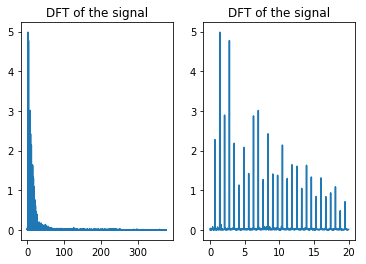

In [106]:
Line=ECG_Signal[:43081]
data=Line-np.mean(Line)
L=len(data)

f=np.arange(0,75e1/2,75e1/43081)
Y=np.fft.fft(data)
Pyy=abs(Y)/L

plt.subplot(121)
plt.plot(f, Pyy[:21541])
plt.title('DFT of the signal')
plt.ticklabel_format(style='plain', axis='x', scilimits=(0,0))

inx=np.where(f>20)
inx=inx[0]
plt.subplot(122)
plt.plot(f[:inx[0]], Pyy[:inx[0]])
plt.title('DFT of the signal')
plt.ticklabel_format(style='plain', axis='x', scilimits=(0,0))
x=np.amax(Pyy[:21541])
print 'Peak of DFT is ' +str(x)

In [107]:
x=np.arange(21541)
for index in x:
    if Pyy[index]>=4.9814:
        print 'Frequency at which maximum is observed is =' +str(index/57.44)  
        break 

Frequency at which maximum is observed is =1.39275766017


The heart rate = 60/Frequency at which maximum is observed

               = 60/1.39275766017
               = 43.08 which is approximately = 43 

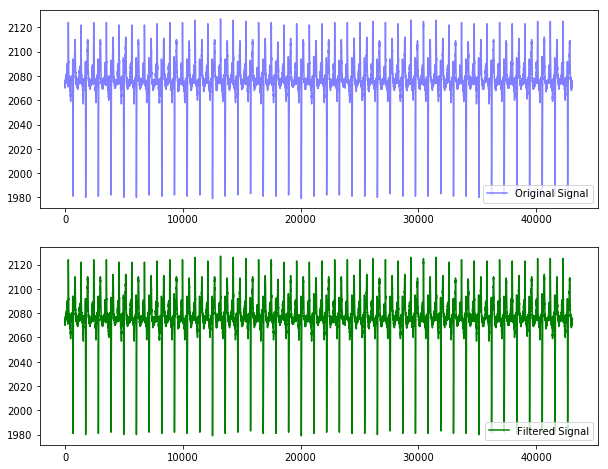

In [108]:
from scipy.signal import butter, lfilter 


def butter_lowpass(cutoff, fs, order=4):
    Nyqfreq = 0.5 * fs 
    normal_cutoff = cutoff / Nyqfreq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a
    
def butter_lowpass_filter(data, cutoff, fs, order):
    b, a = butter_lowpass(cutoff, fs, order=order)
    w = lfilter(b, a, data)
    return w


filtered = butter_lowpass_filter(Line, 10e1, 200.0, 4)


plt.figure (figsize=(10,8))
plt.subplot(211)
plt.plot(Line, color='b', alpha=0.5, label='Original Signal')
plt.legend(loc=4)
plt.subplot(212)
plt.plot(filtered, color='g', label='Filtered Signal')

plt.legend(loc=4)
plt.show()


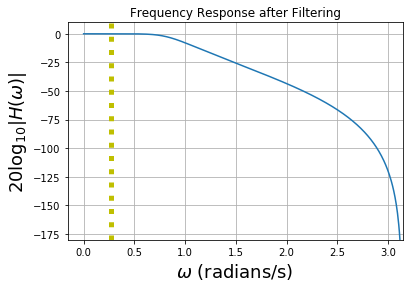

In [109]:


plt.plot(w, 20 * np.log10(abs(h)))
plt.title('Frequency Response after Filtering')
plt.ylabel(r"$ 20 \log_{10}|H(\omega)| $",fontsize=18)
plt.xlabel(r'$\omega$ (radians/s)',fontsize=18)
plt.xlim(xmax = np.pi)
plt.ylim(ymin=-180,ymax=10)
plt.vlines(Wn,-180,180,linestyles=':',color='y',lw=5.)
plt.grid()

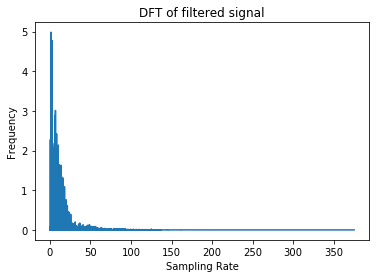

In [110]:
L1=len(s)

f1=np.arange(0,75e1/2,75e1/43081.)
Y1=np.fft.fft(s)
Pyy=abs(Y1)/L1

plt.plot(f1, Pyy[:21541])
plt.title('DFT of filtered signal')
plt.ylabel("Frequency")
plt.xlabel('Sampling Rate')

# Bibliography

## Citation

[1] L. Smolarik et al., "ECG Signal Processing", Advanced Materials Research, Vol. 749, pp. 394-400, 2013


[2] MLA - Yeh, Yun-Chi, and Wen-June Wang. "QRS complexes detection for ECG signal: The Difference Operation Method." Computer             methods and programs in biomedicine 91.3 (2008): 245-254.

   APA - Yeh, Y. C., & Wang, W. J. (2008). QRS complexes detection for ECG signal: The Difference Operation Method. Computer             methods and programs in biomedicine, 91(3), 245-254.
    
 Chicago - Yeh, Yun-Chi, and Wen-June Wang. "QRS complexes detection for ECG signal: The Difference Operation Method."                     Computer methods and programs in biomedicine 91, no. 3 (2008): 245-254.
 
 Harvard - Yeh, Y.C. and Wang, W.J., 2008. QRS complexes detection for ECG signal: The Difference Operation Method. Computer                methods and programs in biomedicine, 91(3), pp.245-254.
 
 Vancouver - Yeh YC, Wang WJ. QRS complexes detection for ECG signal: The Difference Operation Method. Computer methods and                  programs in biomedicine. 2008 Sep 30;91(3):245-54.
 
 ## References
 
[1] B.U. Kohler, C. Henning, R. Orglmeister, The principles of software QRS detection, IEEE Eng. Med. Biol., 21 (1) (2002),         pp.42-57

[2] R.M. Rangayyan, Biomedical Signal Analysis: A Case-study Approach, Wiley–Interscience, New York (2001), pp. 18–28

[3] R. Silipo, C. Marchesi, Artificial neural networks for automatic ECG analysis, IEEE Trans. Signal Process., 46 (5) (1998),       pp. 1417-1425